In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [26]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [27]:
train_set[0]

'What is the step by step guide to invest in share market in india?'

In [28]:
train_set[404289]

'What is like to have sex with cousin?'

In [29]:
print(len(train_set)) #큐1,큐2 두개를 합쳐서 2배의 렝스가 된 것

808580


In [30]:
print('훈련 데이터의 총 질문수: {}'.format(len(np.unique(train_set))))

훈련 데이터의 총 질문수: 537361


In [31]:
print('중복 질문 수: {}'.format(np.sum(train_set.value_counts() > 1 )))

중복 질문 수: 111873


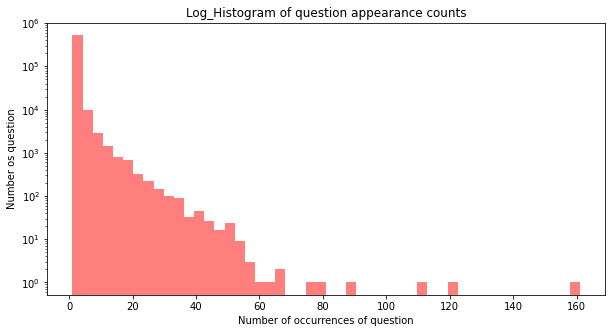

In [32]:
plt.figure(figsize=(10,5))
plt.hist(train_set.value_counts(),bins=50, alpha=0.5, color='r')
plt.yscale('log', nonpositive='clip')
plt.title('Log_Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number os question')
plt.show()
        

In [33]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('중복 제1사분위 중복: {}'.format(np.percentile(train_set.value_counts(),25)))
print('중복 제3사분위 중복: {}'.format(np.percentile(train_set.value_counts(),75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
중복 제1사분위 중복: 1.0
중복 제3사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x236044ba850>,
 'caps': [<matplotlib.lines.Line2D at 0x236044baf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x236044ba5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x236044c46d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x236044c4df0>],
 'means': [<matplotlib.lines.Line2D at 0x236044c4a60>]}

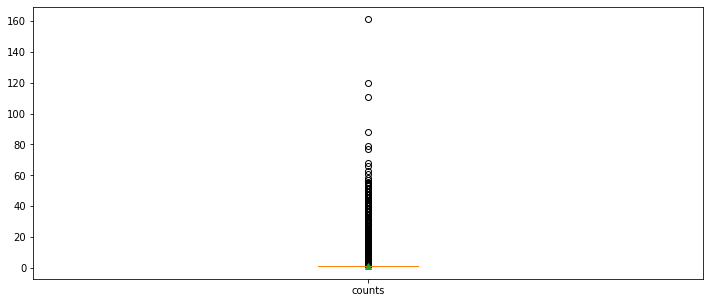

In [34]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],
            labels=['counts'],
            showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

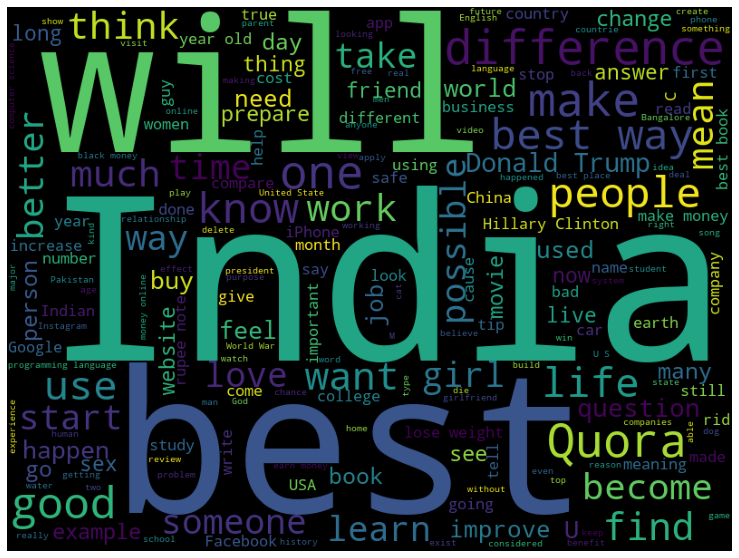

In [35]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

C:\Users\seulki\anaconda3\envs\nltk\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

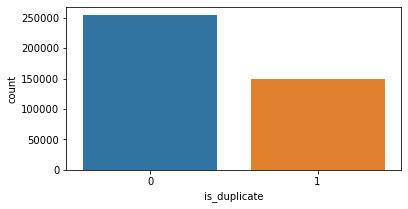

In [36]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])

In [37]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

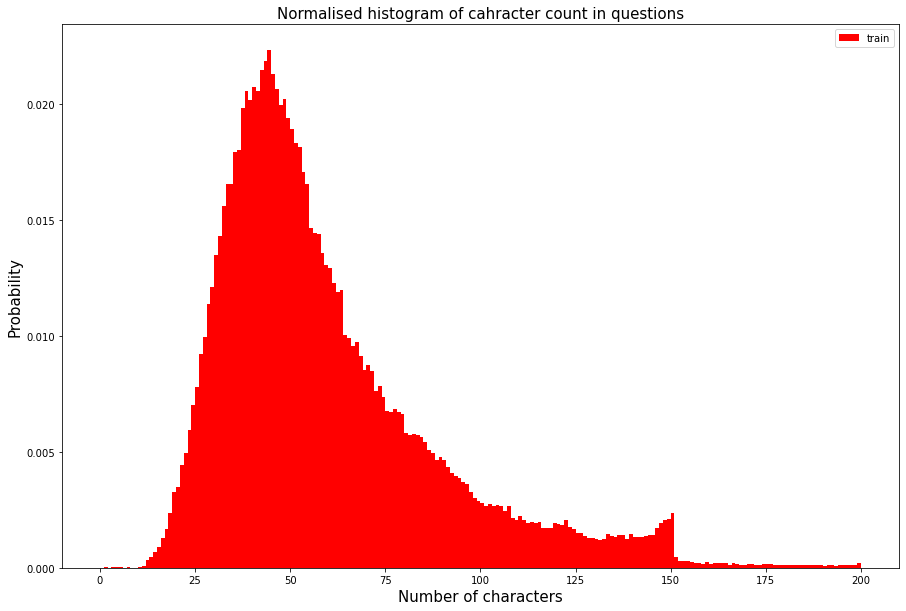

In [42]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of cahracter count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [45]:
print('질문 길이 최댓값: {}'.format(np.max(train_length)))
print('질문 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값: {:.2f}'.format(np.median(train_length)))
print('질문 길이 제1사분위: {:.2f}'.format(np.percentile(train_length, 25)))
print('질문 길이 제3사분위: {:.2f}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값: 1169
질문 길이 평균값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간값: 51.00
질문 길이 제1사분위: 39.00
질문 길이 제3사분위: 72.00


{'whiskers': [<matplotlib.lines.Line2D at 0x23612db4370>,
 'caps': [<matplotlib.lines.Line2D at 0x23612db4a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x236139aafa0>],
 'medians': [<matplotlib.lines.Line2D at 0x23612da91f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23612da9910>],
 'means': [<matplotlib.lines.Line2D at 0x23612da9580>]}

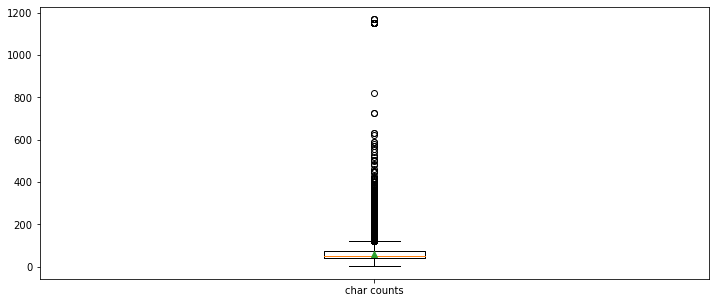

In [47]:
plt.figure(figsize=(12,5))

plt.boxplot(train_length,
            labels=['char counts'],
            showmeans=True)

In [49]:
train_word_counts = train_set.apply(lambda x:len(x.split()))

Text(0, 0.5, 'Probability')

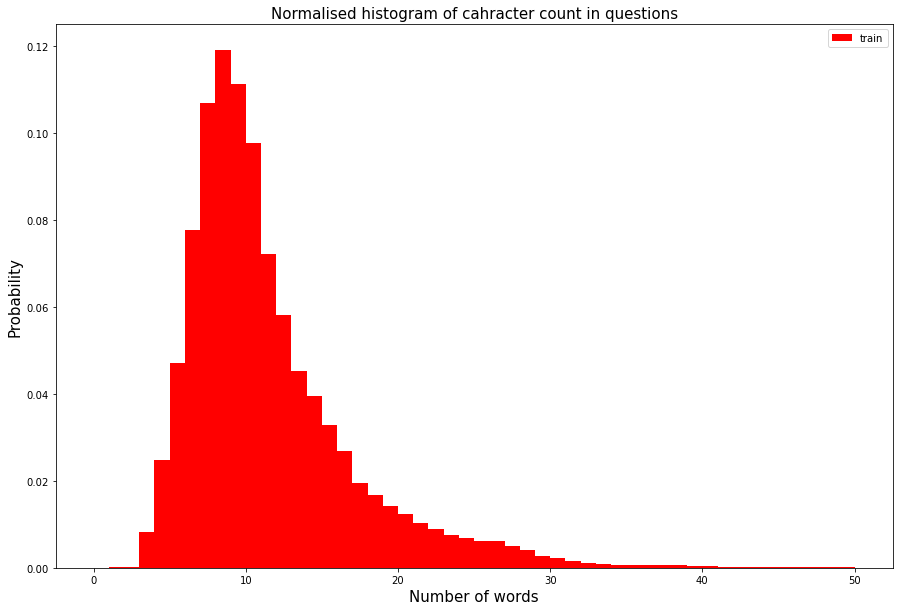

In [52]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of word count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [55]:
print('질문 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최댓값: 237
질문 단어 개수 평균값: 11.06
질문 단어 개수 표준편차: 5.88
질문 단어 개수 중간값: 10.0
질문 단어 개수 제1사분위: 7.0
질문 단어 개수 제3사분위: 13.0
질문 단어 개수 99퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2360442a220>,
 'caps': [<matplotlib.lines.Line2D at 0x2360442ad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2360442a520>],
 'medians': [<matplotlib.lines.Line2D at 0x2363e048ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2363e048520>],
 'means': [<matplotlib.lines.Line2D at 0x2363e048a30>]}

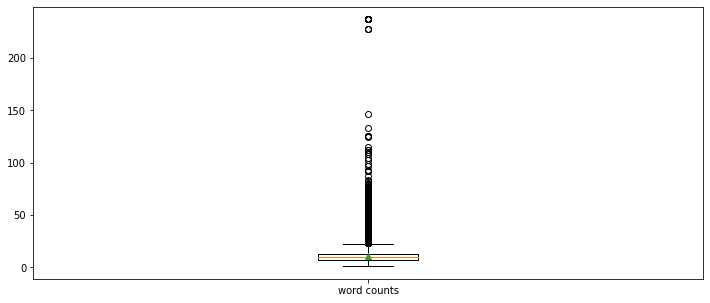

In [56]:
plt.figure(figsize=(12,5))

plt.boxplot(train_word_counts,
            labels=['word counts'],
            showmeans=True)

In [57]:
qmarks= np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))
capital = np.mean(train_set.apply(lambda x: max(y.isupper() for y in x)))
numbers = np.mean(train_set.apply(lambda x: max(y.isdigit() for y in x)))                                

In [59]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가 있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capital * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자인 질문: 99.81%
대문자가 있는 질문: 99.95%
숫자가 있는 질문: 11.83%


In [71]:
import re
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
FILTERS = r'[~.,!?\":;]'
MAX_SEQUENCE_LENGTH = 31
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv',encoding='utf-8')

In [73]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1- (class_difference / len(train_neg_data))
                  
train_neg_data = train_neg_data.sample(frac= sample_frac)

- 예를 들면, 중복이 아닌 것이 10,000개, 중복인 것이 3,000개일 경우
- 둘의 차이는 7,000개
- 위의 식으로 샘플 %를 구하면 1 - (7,000 / 10,000) = 0.3
- 10,000 * 0.3 = 3000개

In [74]:
print('중복 질문: {}'.format(len(train_pos_data)))
print('중복 아닌 질문: {}'.format(len(train_neg_data)))

중복 질문: 149263
중복 아닌 질문: 149263


In [75]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [76]:
change_filter = re.compile(FILTERS)

question1 = [str(s) for s in train_data['question1']]
question2 = [str(s) for s in train_data['question2']]

filtered_question1 = list()
filtered_question2 = list()

for q in question1:
    filtered_question1.append(re.sub(change_filter,'',q).lower())
    
for q in question2:
    filtered_question2.append(re.sub(change_filter, '',q).lower())
                    

In [77]:
print(filtered_question1[:3])

['what are the risks of hormone replacement therapy', 'what has been the lowest point in your life', 'love can love really last a lifetime']


In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_question1 + filtered_question2)

In [80]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_question1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_question2)

In [79]:
print(questions1_sequence)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [81]:
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [82]:
word_vocab = tokenizer.word_index
labels = np.array(train_data['is_duplicate'], dtype=int)
print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data: {}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print('Words in index: {}'.format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 79243


In [83]:
data_config = {}
data_config['vocab'] = word_vocab
data_config['vocab_size'] = len(word_vocab)

In [85]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'trian_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), labels)
json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS,'w'))

In [86]:
test_data= pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
test_data.head()

C:\Users\seulki\anaconda3\envs\nltk\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563475 entries, 0 to 3563474
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   test_id    object
 1   question1  object
 2   question2  object
dtypes: object(3)
memory usage: 81.6+ MB


In [88]:
valid_ids = [type(x) == int for x in test_data.test_id]
print(len(valid_ids))

3563475


In [89]:
test_data = test_data[valid_ids].drop_duplicates()
print(len(test_data))

2345796


In [90]:
test_question1 = [str(s) for s in test_data['question1']]
test_question2 = [str(s) for s in test_data['question2']]

filtered_test_question1 = list()
filtered_test_question2 = list()

for q in test_question1:
    filtered_test_question1.append(re.sub(change_filter,'',q).lower())
    
for q in test_question2:
    filtered_test_question2.append(re.sub(change_filter, '',q).lower())

In [91]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_question1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_question2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [92]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data: {}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data: (2345796, 31)
Shape of ids: (2345796,)


In [93]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)